### Crawl


#### Playlist

Genres to crawl : 
- Pop
- Instrumental
- Jazz
- Electronic
- Rock
- Classical
- Folk
- Country
- Vietnamese pop

#### Crawl all

In [2]:
import os 
import pandas as pd

DATASET_PATH = 'data/'
AUDIO_PATH = os.path.join(DATASET_PATH + 'audio') 

In [2]:
df_spotify_original = pd.read_csv(DATASET_PATH + "tracks_metadata.csv")

In [17]:
from scraper import Request, Scraper

request = Request().request()
scraper = Scraper(session=request)

In [4]:
import json

# Read the JSON file
with open('spotify_playlists.json', 'r') as file:
    data = json.load(file)

# Store the data as a dictionary
data = dict(data)

# Tạo dictionary mới
urls_dict = {}

# Lặp qua các key và value trong dictionary
for key, value in data.items():
    # Nếu value là một list chứa các dict, chúng ta sẽ chỉ giữ lại URL
    if isinstance(value, list):
        urls = []
        for item in value : 
            if item.get('state') == "using" : 
                urls.append(item['url'])
        urls_dict[key] = urls
        
print(urls_dict)

{'pop': ['https://open.spotify.com/playlist/37i9dQZF1DWVlLVXKTOAYa', 'https://open.spotify.com/playlist/37i9dQZF1DXcRXFNfZr7Tp', 'https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M', 'https://open.spotify.com/playlist/37i9dQZF1DWT1y71ZcMPe5', 'https://open.spotify.com/playlist/37i9dQZF1DWU13kKnk03AP', 'https://open.spotify.com/playlist/37i9dQZF1DWYBO1MoTDhZI', 'https://open.spotify.com/playlist/37i9dQZF1DX4fpCWaHOned', 'https://open.spotify.com/playlist/37i9dQZF1DX1uHCeFHcn8X'], 'instrumental': ['https://open.spotify.com/playlist/37i9dQZF1DX1s9knjP51Oa', 'https://open.spotify.com/playlist/37i9dQZF1DX4sWSpwq3LiO', 'https://open.spotify.com/playlist/37i9dQZF1DWZd79rJ6a7lp', 'https://open.spotify.com/playlist/37i9dQZF1DX0jgyAiPl8Af'], 'rock': ['https://open.spotify.com/playlist/37i9dQZF1DWZryfp6NSvtz', 'https://open.spotify.com/playlist/37i9dQZF1DX14rbJEM3cke', 'https://open.spotify.com/playlist/37i9dQZF1DX78toxP7mOaJ', 'https://open.spotify.com/playlist/37i9dQZF1DWT2jS7NwYPVI', 'ht

In [5]:
df_whole = pd.DataFrame() 

for item, values in urls_dict.items() : 
    print(item)
    if values == [] : 
        continue
    tracks_df = scraper.get_playlist_tracks_info(values, genre=item)
    tracks_df = scraper.crawl_and_append_track_info(tracks_df)
    if tracks_df.empty:
        continue
    tracks_df = tracks_df.dropna(subset=['preview_mp3'])
    # check duplicates 
    tracks_df = tracks_df[~tracks_df['track_id'].isin(df_spotify_original['track_id'])]
    if 'track_id' in df_whole.columns:
        df_whole = pd.concat([df_whole, tracks_df[~tracks_df['track_id'].isin(df_whole['track_id'])]], ignore_index=True)
    else:
        df_whole = pd.concat([df_whole, tracks_df], ignore_index=True)

df_whole.drop_duplicates(inplace=True)

pop
Exception occurred: Message: stale element reference: stale element not found in the current frame
  (Session info: chrome-headless-shell=125.0.6422.142); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
	GetHandleVerifier [0x00007FF733531F52+60322]
	(No symbol) [0x00007FF7334ACEC9]
	(No symbol) [0x00007FF733367EBA]
	(No symbol) [0x00007FF73336DCEE]
	(No symbol) [0x00007FF733370968]
	(No symbol) [0x00007FF7333FC95B]
	(No symbol) [0x00007FF7333DC21A]
	(No symbol) [0x00007FF7333FBC80]
	(No symbol) [0x00007FF7333DBFC3]
	(No symbol) [0x00007FF7333A9617]
	(No symbol) [0x00007FF7333AA211]
	GetHandleVerifier [0x00007FF7338494AD+3301629]
	GetHandleVerifier [0x00007FF7338936D3+3605283]
	GetHandleVerifier [0x00007FF733889450+3563680]
	GetHandleVerifier [0x00007FF7335E4326+790390]
	(No symbol) [0x00007FF7334B750F]
	(No symbol) [0x00007FF7334B3404]
	(No symbol) [0x00007FF7334B359

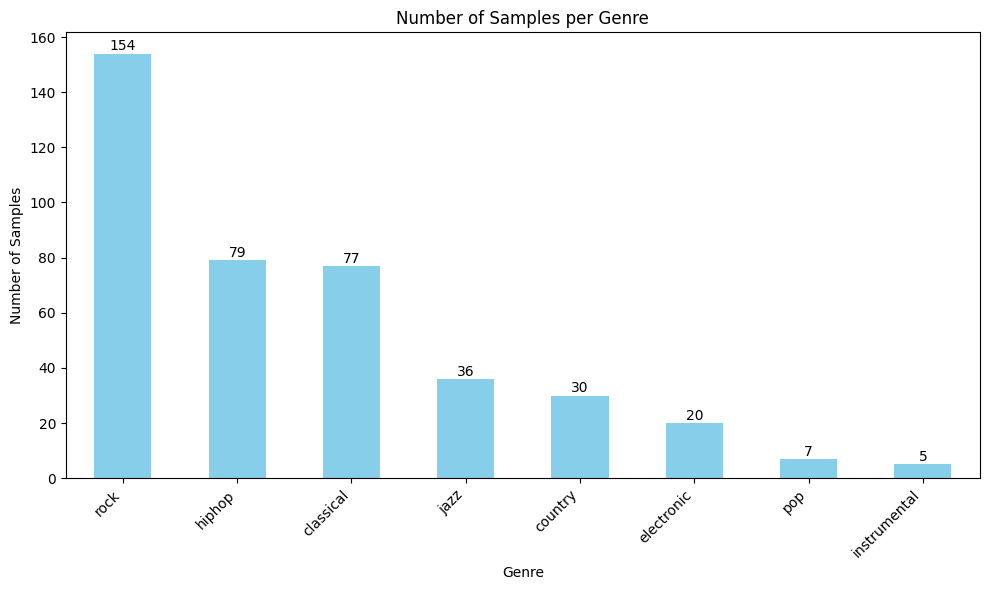

In [6]:
from matplotlib import pyplot as plt

# Tạo dataframe từ cột 'genre' và đếm số lượng mẫu cho mỗi thể loại
genre_counts = df_whole['genre'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Samples per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Thêm chú thích con số lên từng cột
for i, count in enumerate(genre_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

In [7]:
from datetime import datetime

current_date = datetime.now().strftime("%d_%m")
df_whole.to_csv(DATASET_PATH + f"tracks_metadata_{current_date}.csv", index=False)

#### Using Spotify API 

In [3]:
import pandas as pd 
from datetime import datetime

current_date = datetime.now().strftime("%d_%m")

df_whole = pd.read_csv(DATASET_PATH + f"tracks_metadata_{current_date}.csv")
print(len(df_whole))

408


In [ ]:
# from dotenv import load_dotenv
# import os 
# import base64
# import requests
# import json
# import webbrowser
# from urllib.parse import urlencode

# load_dotenv() 

# client_id = os.getenv("CLIENT_ID") 
# client_secret = os.getenv("CLIENT_SECRET") 
# redirect_uri = os.getenv("REDIRECT_URI")  

# def get_authorization_code() : 
#     auth_headers = {
#         "client_id" : client_id,
#         "response_type" : "code",
#         "redirect_uri" : "http://localhost:3000",
#         "scope" : "user-library-read"
#     }
    
#     webbrowser.open("https://accounts.spotify.com/authorize?" + urlencode(auth_headers))

# get_authorization_code() 



In [ ]:
# # trên redirect url sẽ có dạng http://localhost:3000/?code=....
# # copy giá trị của code paste vào đây
# code = "AQBfchP_vLdIVa7vQhbzsKD5MQvStCXwlbdHyy4u4qLWdS2fufvLu4GnAeYxOC70FS5OjWX6rCpniL_0a75Z9f_BlewUvsPW_It_df-KFv4xiOfga62eNFumxScik682-ntllSxATvKdy3tjgBFcxloCuO4C43iVXIHTdcHlPQzvATCNV9HznSTwvNY"

In [4]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
from dotenv import load_dotenv
import os 
import base64
import requests
import json
from urllib.parse import urlencode
from selenium.webdriver.chrome.options import Options

load_dotenv() 

client_id = os.getenv("CLIENT_ID") 
client_secret = os.getenv("CLIENT_SECRET") 
redirect_uri = os.getenv("REDIRECT_URI")  
email = os.getenv("SPOTIFY_EMAIL")
password = os.getenv("SPOTIFY_PASSWORD")
# Khởi tạo trình duyệt
options = Options()
options.add_argument('--headless')
options.add_argument("--log-level=3") 
driver = webdriver.Chrome(options=options)  # hoặc Firefox hoặc WebDriver của trình duyệt khác

# Truy cập trang web của Spotify để yêu cầu mã authorization
driver.get(f"https://accounts.spotify.com/authorize?client_id={client_id}&response_type=code&redirect_uri=http://localhost:3000&scope=user-library-read")

# Chờ cho trang web tải hoàn thành
time.sleep(5)

# Tìm các trường nhập liệu và nút đăng nhập
username_input = driver.find_element(By.CSS_SELECTOR, "input#login-username")
password_input = driver.find_element(By.CSS_SELECTOR, "input#login-password")
login_button = driver.find_element(By.CSS_SELECTOR, "button#login-button")

# Nhập thông tin đăng nhập
username_input.send_keys(email)
password_input.send_keys(password)

# Nhấn nút đăng nhập
login_button.click()

# Chờ trang web xử lý đăng nhập
time.sleep(5)

# Lấy URL hiện tại sau khi đã redirect
redirect_url = driver.current_url

# Tách mã authorization từ URL
authorization_code = redirect_url.split("code=")[1]

# In mã authorization
print("Authorization code:", authorization_code)

# Đóng trình duyệt
driver.quit()


Authorization code: AQDbznphB9bxNBU-IPaL_xV2t-239EcTmsLPWYpc4Mg8L8UDMnfASrni4Mbivr-uUczkJKjfPHJyF_Ps_yPYg3lf5bhjfpRN4jR07ujhmz3P3wxYb3gBm63HPNvB033chOCKvmaksBrNWfdavZlgtzP39KCFEnEiQe83Xa53iWFf_wZbYPTaXOSQo2Y


In [5]:
def get_token() : 
    auth_string = client_id + ":" + client_secret
    auth_bytes = auth_string.encode("utf-8") 
    auth_base64 = str(base64.b64encode(auth_bytes), "utf-8") 
    
    url = "https://accounts.spotify.com/api/token" 
    headers = {
        "Authorization" : "Basic " + auth_base64,
        "content-type" : "application/x-www-form-urlencoded"  
    }
    token_data = {
        "grant_type" :"authorization_code",
        "code" : authorization_code,
        "redirect_uri" : "http://localhost:3000"
    } 
    result = requests.post(url, headers=headers, data=token_data) 
    json_result = json.loads(result.content) 
    # print(json_result)
    token = json_result["access_token"] 
    return token 

token = get_token() 
print(token)

BQC1r16MKMxY12U1YuEg7NthfPkHjOkk5yQNx_FgPxGRyIqHx3a3Ko4vmJSg0Wi74bLiH_r2yW7AYPFq0NBXSYInfRJ5Mfz-IOL4hJRQVOThq2-QMyHjFTtPhBudVlfOb4intm-dgM3WNrZ2hWpFLgqSoskdexuhRP46gtrxLBL0vVUn7pVzbP3I3eYr9nG7yaD7hIWrW3BmrKs


In [6]:
def get_audio_features(track_ids) : 
    api_url = "https://api.spotify.com/v1/audio-features"
    user_headers = {
        "Authorization": "Bearer " + token,
        "Content-Type": "application/json"
    } 
    params = {"ids": ",".join(track_ids)}
    response = requests.get(api_url, headers=user_headers, params=params)
    
    if response.status_code == 200:
        return response.json()["audio_features"]
    else:
        print(f"Failed to get audio features. Status code: {response.status_code}")
        return None
      

In [7]:
def get_audio_features_dataframe(df : pd.DataFrame) : 
    if token : 
        chunk_size = 100 
        total_rows = len(df) 
        batch = []
        remaining = total_rows
        previous_index = 0
        
        for i in range(0, total_rows) : 
            # current_chunk_size = min(chunk_size, total_rows-i) 
            
            track_id = df.loc[i,"track_id"] 
            batch.append(track_id) 
            remaining -= 1 
            
            if len(batch) == 100 or remaining==0: 
                print("remaining =",remaining)
                print("start =",previous_index)
                # call api
                audio_features = get_audio_features(batch) 
                print(len(audio_features))
        
                for index, item in enumerate(audio_features):
                    if item is None:
                        print("None found at index:", index)
                        audio_features[index] = {
                            'danceability': None,
                            'energy': None,
                            'key': None,
                            'loudness': None,
                            'mode': None,
                            'speechiness': None,
                            'acousticness': None,
                            'instrumentalness': None,
                            'liveness': None,
                            'valence': None,
                            'tempo': None,
                            'type': None,
                            'id': None,
                            'uri': None,
                            'track_href': None,
                            'analysis_url': None,
                            'duration_ms': None,
                            'time_signature': None
                        }
                        
                        
                if audio_features : 
                    # Lọc bỏ các đối tượng None từ audio_features
                    audio_features_df = pd.DataFrame(audio_features) 
                    audio_features_df = audio_features_df.drop(columns=["analysis_url", "duration_ms", "id", "track_href", "type", "uri"], axis=1) 
                    # print("len batch", len(batch))
                    df.loc[previous_index:previous_index + len(batch) - 1, audio_features_df.columns] = audio_features_df.values
                
                previous_index = i+1
                # reset batch sau mỗi lần call api
                batch = []
                print("-"*10)
            
    return df
            


In [8]:
new_df_with_audio_features = get_audio_features_dataframe(df_whole)
new_df_with_audio_features

remaining = 308
start = 0
100
None found at index: 7
None found at index: 11
----------
remaining = 208
start = 100
100
----------
remaining = 108
start = 200
100
----------
remaining = 8
start = 300
100
----------
remaining = 0
start = 400
8
----------


track_title  \
0                                    LUNCH   
1    I Had Some Help (Feat. Morgan Wallen)   
2                               Stargazing   
3                                  CHIHIRO   
4                                     Risk   
..                                     ...   
403          Give Me Everything - Stripped   
404                          Cheap Thrills   
405                      Snow On The Beach   
406                                Jealous   
407                               Dynamite   

                                             track_url  \
0    https://open.spotify.com/track/629DixmZGHc7ILt...   
1    https://open.spotify.com/track/7221xIgOnuakPdL...   
2    https://open.spotify.com/track/3Vr3zh0r7ALn8VL...   
3    https://open.spotify.com/track/7BRD7x5pt8Lqa1e...   
4    https://open.spotify.com/track/73c7iqH4lCVqu4t...   
..                                                 ...   
403  https://open.spotify.com/track/5OSCWSmHCaVD8Kp...   
404  https://open.spotify.com/track/5sVPpYTMUQuKL0j...   
405  https://open.spotify.com/track/2R9V7FCHYlhUius...   
406  https://open.spotify.com/track/48qSRomfnylKcw0...   
407  https://open.spotify.com/track/4InMSe7k0NfeNek...   

                                           track_album      genre  \
0                                 HIT ME HARD AND SOFT        pop   
1                                      I Had Some Help        pop   
2                                           Stargazing        pop   
3                                 HIT ME HARD AND SOFT        pop   
4                                                 Risk        pop   
..                                                 ...        ...   
403  Bridgerton Season Three (Covers from the Netfl...  classical   
404  Bridgerton Season Three (Covers from the Netfl...  classical   
405  Bridgerton Season Three (Covers from the Netfl...  classical   
406  Bridgerton Season Three (Covers from the Netfl...  classical   
407  Bridgerton Season Three (Covers from the Netfl...  classical   

                   track_id  \
0    629DixmZGHc7ILtEntuiWE   
1    7221xIgOnuakPdLqT0F3nP   
2    3Vr3zh0r7ALn8VLqCiRR10   
3    7BRD7x5pt8Lqa1eGYC4dzj   
4    73c7iqH4lCVqu4tm66i0tY   
..                      ...   
403  5OSCWSmHCaVD8KpMDRsMzX   
404  5sVPpYTMUQuKL0jC4lQWWO   
405  2R9V7FCHYlhUiusE1lGJ08   
406  48qSRomfnylKcw01TNhjFH   
407  4InMSe7k0NfeNeko4VC5Mg   

                                           preview_mp3 duration  \
0    https://p.scdn.co/mp3-preview/c3a85474a1fc40d8...     2:59   
1    https://p.scdn.co/mp3-preview/add475b56582a3bd...     2:58   
2    https://p.scdn.co/mp3-preview/e645f231787fd914...     2:52   
3    https://p.scdn.co/mp3-preview/2b57d233ddb71379...      5:3   
4    https://p.scdn.co/mp3-preview/102b3802bb833079...     3:11   
..                                                 ...      ...   
403  https://p.scdn.co/mp3-preview/030295afe92d6eb3...     2:12   
404  https://p.scdn.co/mp3-preview/2b9509b94e90b1d5...     3:28   
405  https://p.scdn.co/mp3-preview/0a3c3631928fff8b...     4:12   
406  https://p.scdn.co/mp3-preview/2c84768aa3d8d35d...     3:33   
407  https://p.scdn.co/mp3-preview/3087becab35f720d...     3:18   

                artist_name  \
0             Billie Eilish   
1               Post Malone   
2               Myles Smith   
3             Billie Eilish   
4             Gracie Abrams   
..                      ...   
403            Archer Marsh   
404  Vitamin String Quartet   
405          Atwood Quartet   
406                 Shimmer   
407  Vitamin String Quartet   

                                            artist_url          release_date  \
0    https://open.spotify.com/artist/6qqNVTkY8uBg9c...  2024-05-17T00:00:00Z   
1    https://open.spotify.com/artist/246dkjvS1zLTti...  2024-05-10T00:00:00Z   
2    https://open.spotify.com/artist/3bO19AOone0ubC...  2024-05-10T00:00:00Z   
3    https://open.spotify.com/artist/6qqNVTkY8uBg9c...  2024-05-17T00:00:00Z   
4

In [9]:
rows_with_nan_danceability = new_df_with_audio_features[new_df_with_audio_features['danceability'].isna()]
rows_with_nan_danceability


track_title                                          track_url  \
7   Valse Delle Vigne  https://open.spotify.com/track/3JSPIgK4QMCTSEX...   
11    In Deinen Augen  https://open.spotify.com/track/18HN4qdMe2RJlgq...   

          track_album         genre                track_id  \
7   Valse Delle Vigne  instrumental  3JSPIgK4QMCTSEXZCMRuPj   
11    In Deinen Augen  instrumental  18HN4qdMe2RJlgq3bYH01a   

                                          preview_mp3 duration    artist_name  \
7   https://p.scdn.co/mp3-preview/f4690885b9e042d6...     2:31   Nascondiglio   
11  https://p.scdn.co/mp3-preview/00747d2b8d569d94...      2:4  Jens Wechsler   

                                           artist_url          release_date  \
7   https://open.spotify.com/artist/6ySvmMDgTOV3XT...  2024-02-23T00:00:00Z   
11  https://open.spotify.com/artist/5BsoSlrs9ny1GM...  2022-11-25T00:00:00Z   

    ... key  loudness  mode  speechiness  acousticness  instrumentalness  \
7   ... NaN       NaN   NaN          NaN           NaN               NaN   
11  ... NaN       NaN   NaN          NaN           NaN               NaN   

    liveness  valence  tempo  time_signature  
7        NaN      NaN    NaN             NaN  
11       NaN      NaN    NaN             NaN  

[2 rows x 24 columns]

In [10]:
new_df_with_audio_features = new_df_with_audio_features.dropna(subset=['danceability'])

In [11]:
from datetime import datetime

current_date = datetime.now().strftime("%d_%m")
print("Current date:", current_date)


Current date: 05_06


In [12]:
from datetime import datetime

current_date = datetime.now().strftime("%d_%m")
new_df_with_audio_features.to_csv(DATASET_PATH + f"tracks_metadata_{current_date}.csv", index=False)

In [ ]:
# run this cell when you accidentally write df_whole to tracks_metadata.csv

# import pandas as pd

# # Read the original tracks_metadata.csv file
# original_df = pd.read_csv(DATASET_PATH + "tracks_metadata.csv")

# # Remove the rows in original_df that have the same track_id as those in new_df_with_audio_features
# original_df_1 = original_df[~original_df['track_id'].isin(new_df_with_audio_features['track_id'])]

# # Append the rows from new_df_with_audio_features to original_df
# merged_df = pd.concat([original_df_1, new_df_with_audio_features], ignore_index=True)

# # Write the merged dataframe to the csv file
# merged_df.to_csv(DATASET_PATH + "tracks_metadata.csv", index=False)

In [13]:
# append to csv
new_df_with_audio_features.to_csv(DATASET_PATH+"tracks_metadata.csv",mode='a',header=False, index=False)

In [14]:
df_original = pd.read_csv(DATASET_PATH + "tracks_metadata.csv")
df_original

track_title  \
0                         ...Baby One More Time   
1     DJ Got Us Fallin' In Love (feat. Pitbull)   
2                                        People   
3                  Somebody That I Used To Know   
4                      Murder On The Dancefloor   
...                                         ...   
8725              Give Me Everything - Stripped   
8726                              Cheap Thrills   
8727                          Snow On The Beach   
8728                                    Jealous   
8729                                   Dynamite   

                                              track_url  \
0     https://open.spotify.com/track/3MjUtNVVq3C8Fn0...   
1     https://open.spotify.com/track/4356Typ82hUiFAy...   
2     https://open.spotify.com/track/26b3oVLrRUaaybJ...   
3     https://open.spotify.com/track/1qDrWA6lyx8cLEC...   
4     https://open.spotify.com/track/4tKGFmENO69tZR9...   
...                                                 ...   
8725  https://open.spotify.com/track/5OSCWSmHCaVD8Kp...   
8726  https://open.spotify.com/track/5sVPpYTMUQuKL0j...   
8727  https://open.spotify.com/track/2R9V7FCHYlhUius...   
8728  https://open.spotify.com/track/48qSRomfnylKcw0...   
8729  https://open.spotify.com/track/4InMSe7k0NfeNek...   

                                            track_album      genre  \
0        ...Baby One More Time (Digital Deluxe Version)        Pop   
1                  Raymond v Raymond (Expanded Edition)        Pop   
2                                                People        Pop   
3                                        Making Mirrors        Pop   
4                                          Read My Lips        Pop   
...                                                 ...        ...   
8725  Bridgerton Season Three (Covers from the Netfl...  classical   
8726  Bridgerton Season Three (Covers from the Netfl...  classical   
8727  Bridgerton Season Three (Covers from the Netfl...  classical   
8728  Bridgerton Season Three (Covers from the Netfl...  classical   
8729  Bridgerton Season Three (Covers from the Netfl...  classical   

                    track_id  \
0     3MjUtNVVq3C8Fn0MP3zhXa   
1     4356Typ82hUiFAynbLYbPn   
2     26b3oVLrRUaaybJulow9kz   
3     1qDrWA6lyx8cLECdZE7TV7   
4     4tKGFmENO69tZR9ahgZu48   
...                      ...   
8725  5OSCWSmHCaVD8KpMDRsMzX   
8726  5sVPpYTMUQuKL0jC4lQWWO   
8727  2R9V7FCHYlhUiusE1lGJ08   
8728  48qSRomfnylKcw01TNhjFH   
8729  4InMSe7k0NfeNeko4VC5Mg   

                                            preview_mp3 duration  \
0     https://p.scdn.co/mp3-preview/174e01719c3b06ee...     3:31   
1     https://p.scdn.co/mp3-preview/1619c7342806281d...     3:40   
2     https://p.scdn.co/mp3-preview/abcbc9adf10ae490...      3:4   
3     https://p.scdn.co/mp3-preview/36e1e9984c1a58cb...      4:4   
4     https://p.scdn.co/mp3-preview/340bdf7b29f2725f...     3:50   
...                                                 ...      ...   
8725  https://p.scdn.co/mp3-preview/030295afe92d6eb3...     2:12   
8726  https://p.scdn.co/mp3-preview/2b9509b94e90b1d5...     3:28   
8727  https://p.scdn.co/mp3-preview/0a3c3631928fff8b...     4:12   
8728  https://p.scdn.co/mp3-preview/2c84768aa3d8d35d...     3:33   
8729  https://p.scdn.co/mp3-preview/3087becab35f720d...     3:18   

                 artist_name  \
0             Britney Spears   
1                      USHER   
2                   Libianca   
3                      Gotye   
4        Sophie Ellis-Bextor   
...                      ...   
8725            Archer Marsh   
8726  Vitamin String Quartet   
8727          Atwood Quartet   
8728                 Shimmer   
8729  Vitamin String Quartet   

                                             artist_url          release_date  \
0     https://open.spotify.com/artist/26dSoYclwsYLMA...  1999-01-12T00:00:00Z   
1     https://open.spotify.com/artist/23zg3TcAtWQy7J...  2010-03-30T00:00:00Z   
2     https://open.spotify.com/artist/7kjSu

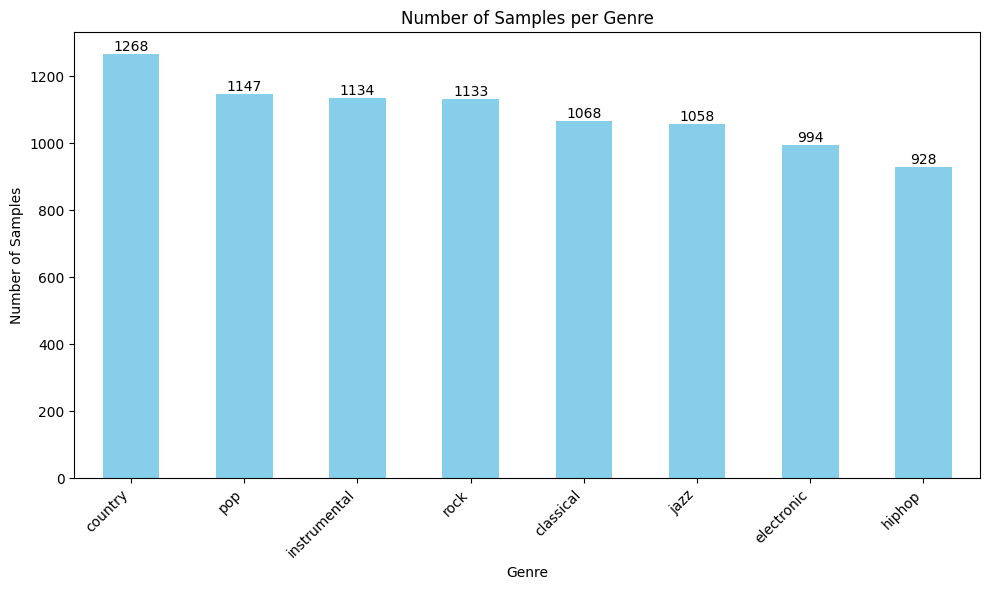

In [15]:
import matplotlib.pyplot as plt
# Tạo dataframe từ cột 'genre' và đếm số lượng mẫu cho mỗi thể loại
genre_counts = df_original['genre'].apply(lambda row : row.lower()).value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Samples per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Thêm chú thích con số lên từng cột
for i, count in enumerate(genre_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

#### Download mp3 audio

In [18]:
import pandas as pd 
from datetime import datetime

current_date = datetime.now().strftime("%d_%m_%Y")
df_today = pd.read_csv(DATASET_PATH + f"tracks_metadata_{datetime.now().strftime('%d_%m')}.csv")
if not os.path.exists(AUDIO_PATH+f"/{current_date}"): 
    os.makedirs(AUDIO_PATH+f"/{current_date}")
scraper.download_preview_mp3(df_today, path=AUDIO_PATH+f"/{current_date}")

### Upload files to google drive 

In [19]:
# !pip install google-api-python-client
from googleapiclient.discovery import build
from google.oauth2 import service_account 
import os
from googleapiclient.http import MediaFileUpload
from tqdm import tqdm
import time

SCOPES = ['https://www.googleapis.com/auth/drive'] 
SERVICE_ACCOUNT_FILE = 'service_account.json' 
DATA_FOLDER_ID = "1l4wFKBZwCDLM7POGL6yYUSua31SxUa7a"
AUDIO_FOLDER_ID = "1E1MAnNagc_xHBgfU5UDWbfdgFk3gp68s"

def authenticate() : 
    creds = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES) 
    return creds

def upload_file(file_path: str, parent_folder_id : str, pbar=None) : 
    
    try : 
        file_name = file_path.split("/")[-1]
    
        # Kiểm tra xem tệp có tồn tại trên Google Drive không
        existing_files = service.files().list(
            q=f"name='{file_name}' and '{parent_folder_id}' in parents",
            fields='files(id)'
        ).execute().get('files', [])
        
        if existing_files:
            # Nếu tệp đã tồn tại, lấy ID của tệp đó để cập nhật
            file_id = existing_files[0]['id']
            
            # Tạo body cho việc cập nhật tệp
            file_metadata = {'name': file_name}
            
            # Tải nội dung mới lên tệp đã tồn tại
            media = MediaFileUpload(file_path)
            updated_file = service.files().update(
                fileId=file_id,
                body=file_metadata,
                media_body=media
            ).execute()
        
        else:
            # Nếu tệp chưa tồn tại, tạo tệp mới
            file_metadata = {
                'name': file_name, 
                'parents': [parent_folder_id]
            }
            media = MediaFileUpload(file_path)
            updated_file = service.files().create(
                body=file_metadata,
                media_body=media,
                supportsAllDrives=True  # Cho phép thay thế tệp đã tồn tại
            ).execute()
            
    except : 
        print("Upload file failed, restart")
        time.sleep(5)
        upload_file(file_path, parent_folder_id, pbar)
    finally : 
        if pbar : 
            pbar.update(1)
        # print("Upload file completed")

def upload_folder(folder_path : str, parent_folder_id : str) : 
    
    
    folder_name = os.path.basename(folder_path) 
    
    folder_metadata = {
        'name' : folder_name,
        'mimeType' : 'application/vnd.google-apps.folder',
        'parents' : [parent_folder_id]
    }
    
    # create folder on google drive
    folder = service.files().create(
        body=folder_metadata,
        fields='id'
    ).execute() 
    folder_id = folder.get('id') 
    
    total_files = len(os.listdir(folder_path))
    with tqdm(total=total_files, desc='Uploading files') as pbar:
        for filename in os.listdir(folder_path) :
            file_path = folder_path + "/" + filename
            # print(file_path)
            # upload files to created folder
            upload_file(file_path, folder_id, pbar)

creds = authenticate() 
service = build('drive', 'v3', credentials=creds)



In [20]:
print("Uploading folder")
# upload audio folder 
upload_folder(AUDIO_PATH+f"/{current_date}", AUDIO_FOLDER_ID)

print("Uploading file metadata")
# upload metadata csv
upload_file(DATASET_PATH + f"tracks_metadata.csv", DATA_FOLDER_ID)

Uploading folder


Uploading files: 100%|██████████| 406/406 [15:12<00:00,  2.25s/it]


Uploading file metadata
